In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

In [2]:
data = pd.read_csv('fashion-mnist.csv')
data.head()

train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

train_labels = train_data['label'].values
train_data = train_data.drop('label', axis=1).values
test_labels = test_data['label'].values
test_data = test_data.drop('label', axis=1).values

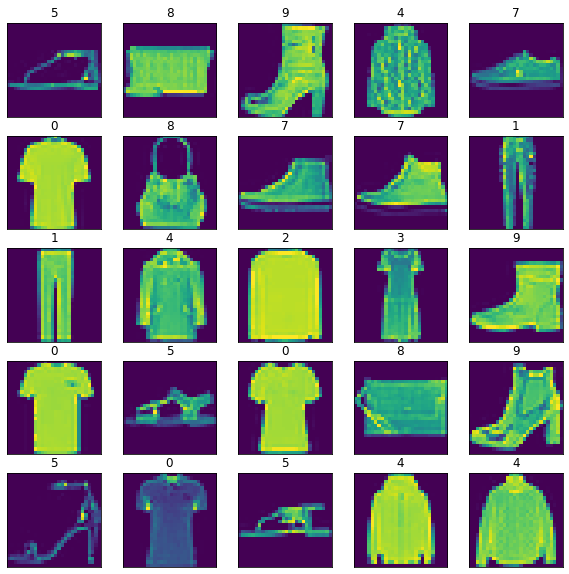

In [3]:
num_im = 25

num_cells = math.ceil(math.sqrt(num_im))
plt.figure(figsize=(10, 10))

for i in range(num_im):
    pixels = train_data[i]
    size = math.ceil(math.sqrt(pixels.size))
    pixels = pixels.reshape(size, size)
    
    plt.subplot(num_cells, num_cells, i+1)
    plt.title(train_labels[i])
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.imshow(pixels)

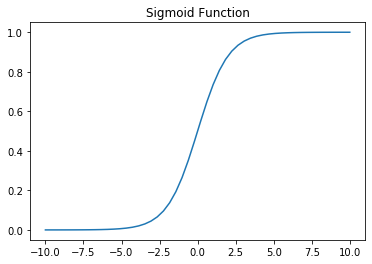

In [4]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

x = np.linspace(-10, 10, 50)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

In [ ]:
num_samples, num_features = train_data.shape
W = None

train_data = (train_data - train_data.min()) / (train_data.max() - train_data.min())
X = np.c_[np.ones(num_samples), train_data]

num_iters = 5000
lr = 0.001
lambda_ = 0.01

start = time.time()


# train each label using one vs all
for label in range(10):
    w = np.random.rand(num_features+1)
    y = (train_labels == label).astype(float)
    for i in range(num_iters):
        diff = sigmoid(X @ w) - y
        for wi in range(len(w)):
            if wi == 0:
                t = diff
                reg_term = 0
            else:
                t = diff @ X[:, wi]
                reg_term = lambda_ * X[:, wi]
                
            w[wi] -= lr * np.sum(t - reg_term) / num_samples
        
        if (i + 1) % 1000 == 0:
            reg_term = lambda_ * np.sum(w[1:] @ w[1:].T) / num_samples
            t = sigmoid(X @ w)
            cost = np.sum(-y * np.log(t) - (1-y) * np.log(1-t)) / 2 / num_samples - reg_term
            print(f'label={label} iteration={i+1} cost={cost:.5f}')
        
    W = w if W is None else np.vstack((W, w))
    
print(f'Training Finished | Time Taken = {time.time() - start:.2f}s')

C:\Users\wweilue\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
C:\Users\wweilue\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply


label=0 iteration=1000 cost=nan
label=0 iteration=2000 cost=nan
label=0 iteration=3000 cost=nan
label=0 iteration=4000 cost=nan
label=0 iteration=5000 cost=nan
label=1 iteration=1000 cost=0.00314
label=1 iteration=2000 cost=0.00135
label=1 iteration=3000 cost=0.00055
label=1 iteration=4000 cost=0.00010
label=1 iteration=5000 cost=-0.00021
label=2 iteration=1000 cost=nan
label=2 iteration=2000 cost=nan
label=2 iteration=3000 cost=nan
label=2 iteration=4000 cost=nan
label=2 iteration=5000 cost=nan
label=3 iteration=1000 cost=0.07075
label=3 iteration=2000 cost=0.04116
label=3 iteration=3000 cost=nan
label=3 iteration=4000 cost=nan
label=3 iteration=5000 cost=nan
label=4 iteration=1000 cost=nan
label=4 iteration=2000 cost=nan
label=4 iteration=3000 cost=nan
label=4 iteration=4000 cost=nan
label=4 iteration=5000 cost=nan
label=5 iteration=1000 cost=0.00857
label=5 iteration=2000 cost=0.00435
label=5 iteration=3000 cost=0.00258
label=5 iteration=4000 cost=0.00146
label=5 iteration=5000 cost

In [ ]:
train_pred = np.argmax(X @ W.T, axis=1)
train_acc = np.sum(train_pred == train_labels) / num_samples
print(f'Train Accuracy = {train_acc:.5f}')

test_X = np.c_[np.ones(len(test_data)), test_data]
test_pred = np.argmax(test_X @ W.T, axis=1)
test_acc = np.sum(test_pred == test_labels) / len(test_data)
print(f'Test Accuracy = {test_acc:.5f}')

In [ ]:
num_im = 9

num_cells = math.ceil(math.sqrt(num_im))
plt.figure(figsize=(10, 10))

for i in range(num_im):
    pixels = W[i][1:]
    size = math.ceil(math.sqrt(pixels.size))
    pixels = pixels.reshape(size, size)
    
    plt.subplot(num_cells, num_cells, i+1)
    plt.title(i)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.imshow(pixels, cmap='Greys')

In [ ]:
num_im = 64

num_cells = math.ceil(math.sqrt(num_im))
plt.figure(figsize=(15, 15))

for i in range(num_im):
    label = test_labels[i]
    pixels = test_data[i]
    size = math.ceil(math.sqrt(pixels.size))
    pixels = pixels.reshape(size, size)
    x = np.concatenate(([1], test_data[i]))
    pred = np.argmax(x @ W.T)
    
    plt.subplot(num_cells, num_cells, i+1)
    plt.title(pred)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.imshow(pixels, cmap='Greens' if pred == label else 'Reds')